In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/bidirectional_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 106s 8ms/step


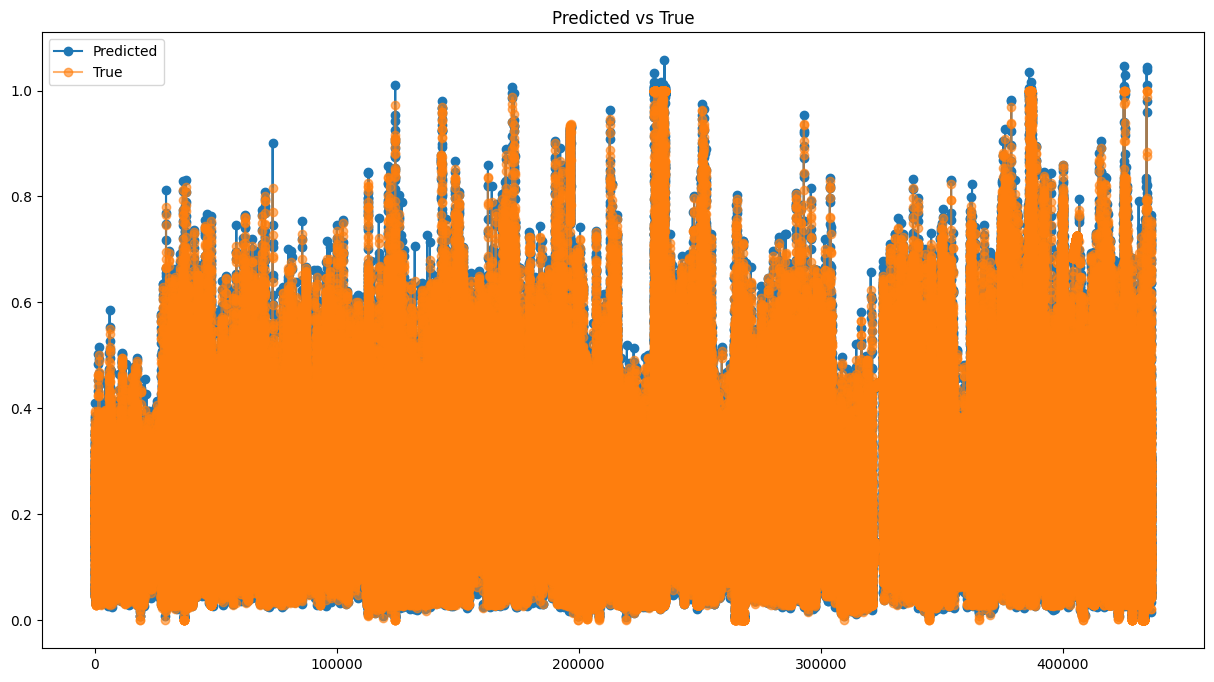

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01087873729924856,
 'mse': 0.01672633879009067,
 'rmse': 0.00027977040932089184}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          142.585434
1          139.483536
2          140.711288
3          137.812943
4          152.173080
...               ...
436598     121.576004
436599     161.517883
436600     202.112595
436601     203.805222
436602     231.414337

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  142.585434
2023-01-01 00:15:00   140.0  139.483536
2023-01-01 00:30:00   139.0  140.711288
2023-01-01 00:45:00   145.0  137.812943
2023-01-01 01:00:00   159.0  152.173080
...                     ...         ...
2035-06-14 21:30:00   137.0  121.576004
2035-06-14 21:45:00   177.0  161.517883
2035-06-14 22:00:00   198.0  202.112595
2035-06-14 22:15:00   216.0  203.805222
2035-06-14 22:30:00   233.0  231.414337

[436603 rows x 2 columns]

AP, BE, EP: (0.983243320003115, 0.01480753638325065, 0.0019491436136343855)


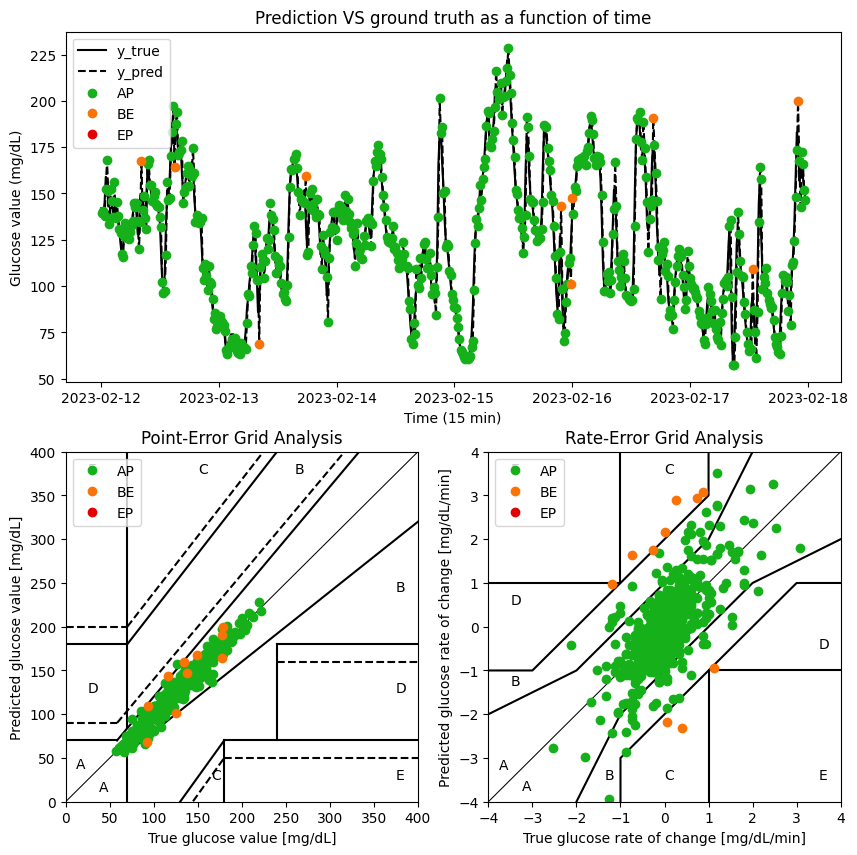

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  142.585434       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  139.483536 -0.066667 -0.206793     AP   
2      2023-02-12 00:30:00   139.0  140.711288 -0.066667  0.081850     AP   
3      2023-02-12 00:45:00   145.0  137.812943  0.400000 -0.193223     AP   
4      2023-02-12 01:00:00   159.0  152.173080  0.933333  0.957343     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  121.576004  2.333333  2.445904     AP   
436599 2035-07-26 21:45:00   177.0  161.517883  2.666667  2.662792     AP   
436600 2035-07-26 22:00:00   198.0  202.112595  1.400000  2.706314     AP   
436601 2035-07-26 22:15:00   216.0  203.805222  1.200000  0.112842     AP   
436602 2035-07-26 22:30:00   233.0  231.414337  1.133333  1.840608     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     B  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 43ms/step


Glucose level Predict  Glucose level True
0               0.223012            0.219565
1               0.216269            0.217391

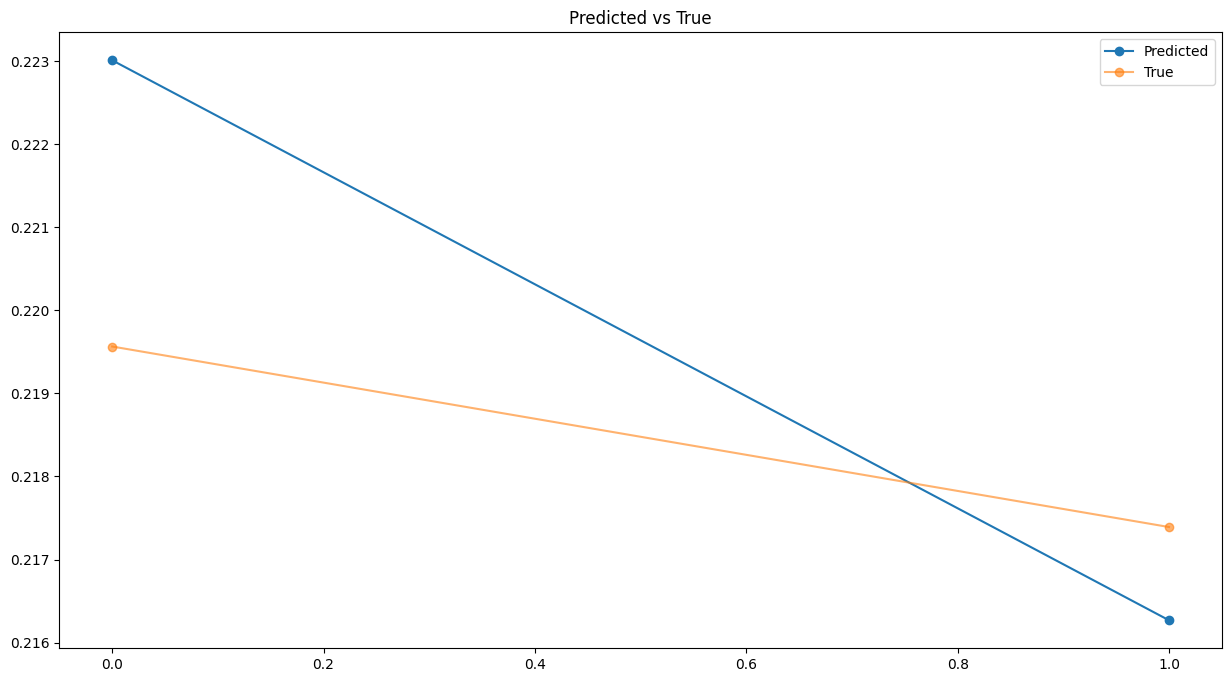

{'mae': 0.002284639814625622,
 'mse': 0.002563130163900977,
 'rmse': 6.569636237099049e-06}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.585419               141.0
1             139.483551               140.0

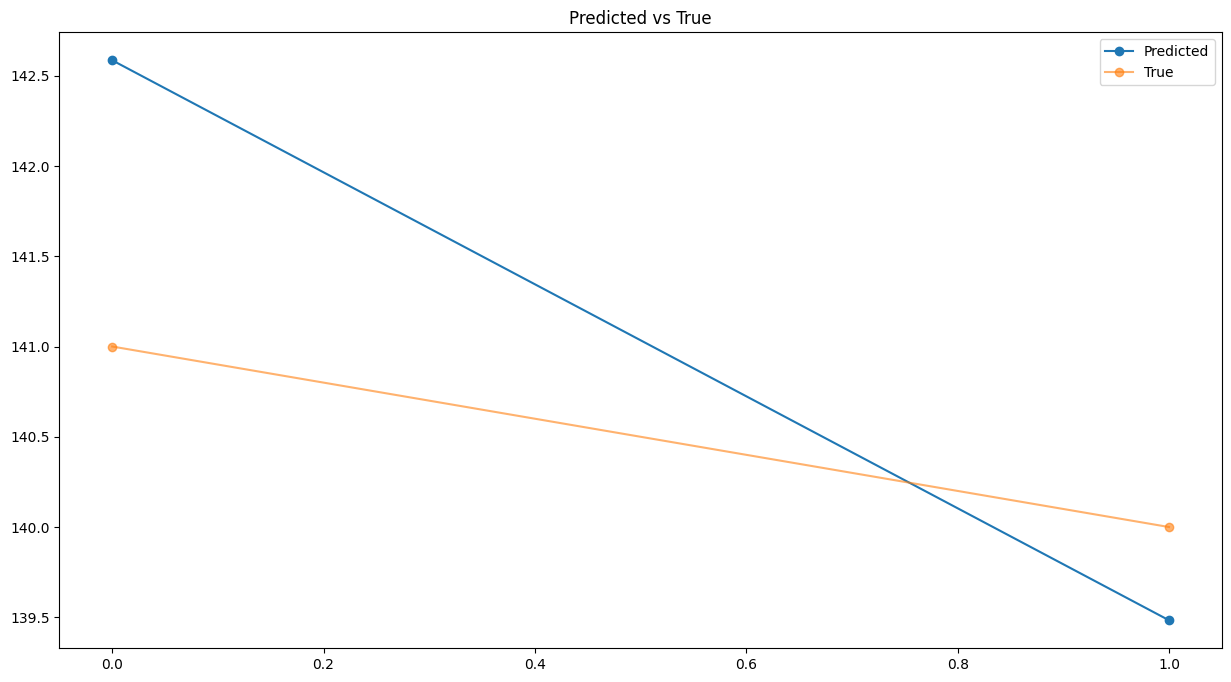

{'mae': 1.050933837890625, 'mse': 1.179040287988623, 'rmse': 1.390136000700295}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 35ms/step


Glucose level Predict  Glucose level True
0               0.223012            0.219565
1               0.223070            0.217391

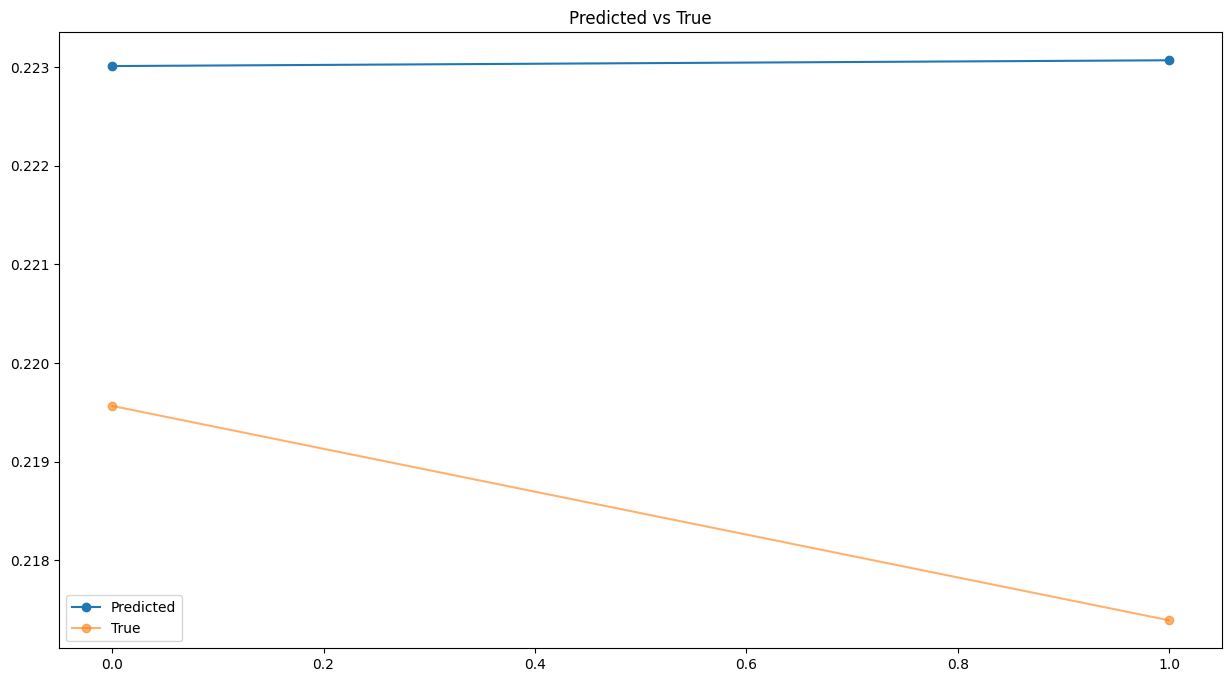

{'mae': 0.004562841420588271,
 'mse': 0.004697404320315409,
 'rmse': 2.206560734851787e-05}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.585419               141.0
1             142.612396               140.0

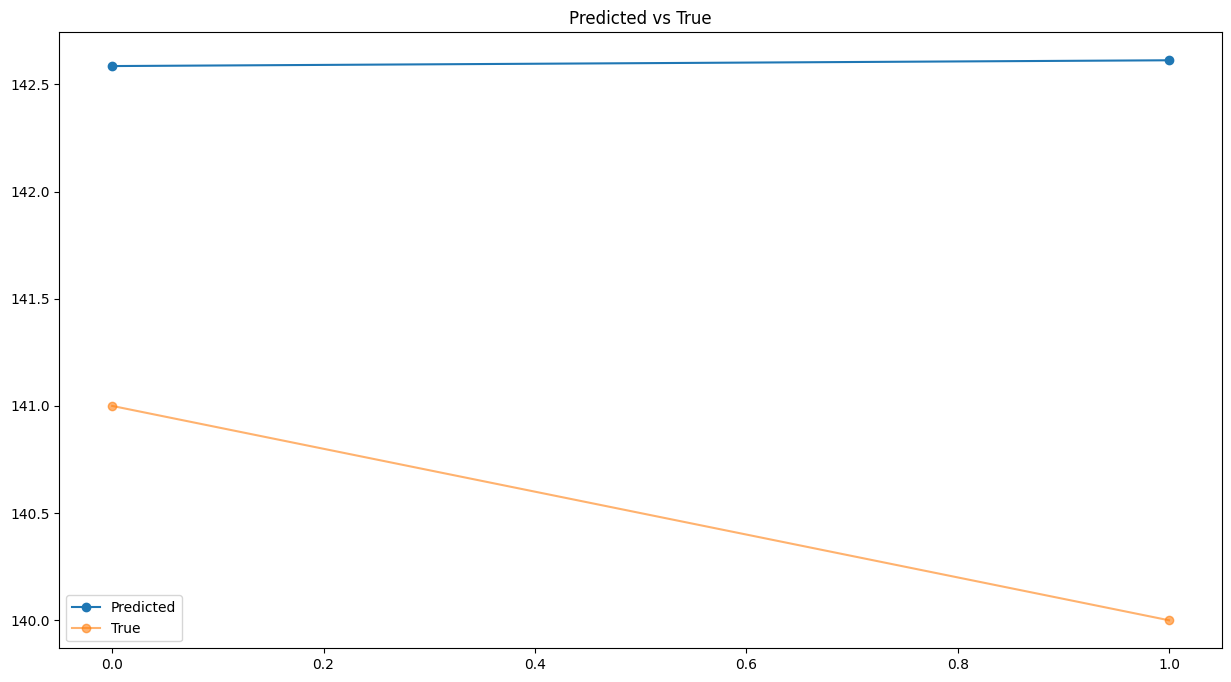

{'mae': 2.098907470703125,
 'mse': 2.1608061659964104,
 'rmse': 4.669083287008107}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 9ms/step


Glucose level Predict  Glucose level True
0               0.225596            0.182609
1               0.139964            0.154348
2               0.154259            0.152174
3               0.151342            0.150000
4               0.147821            0.123913

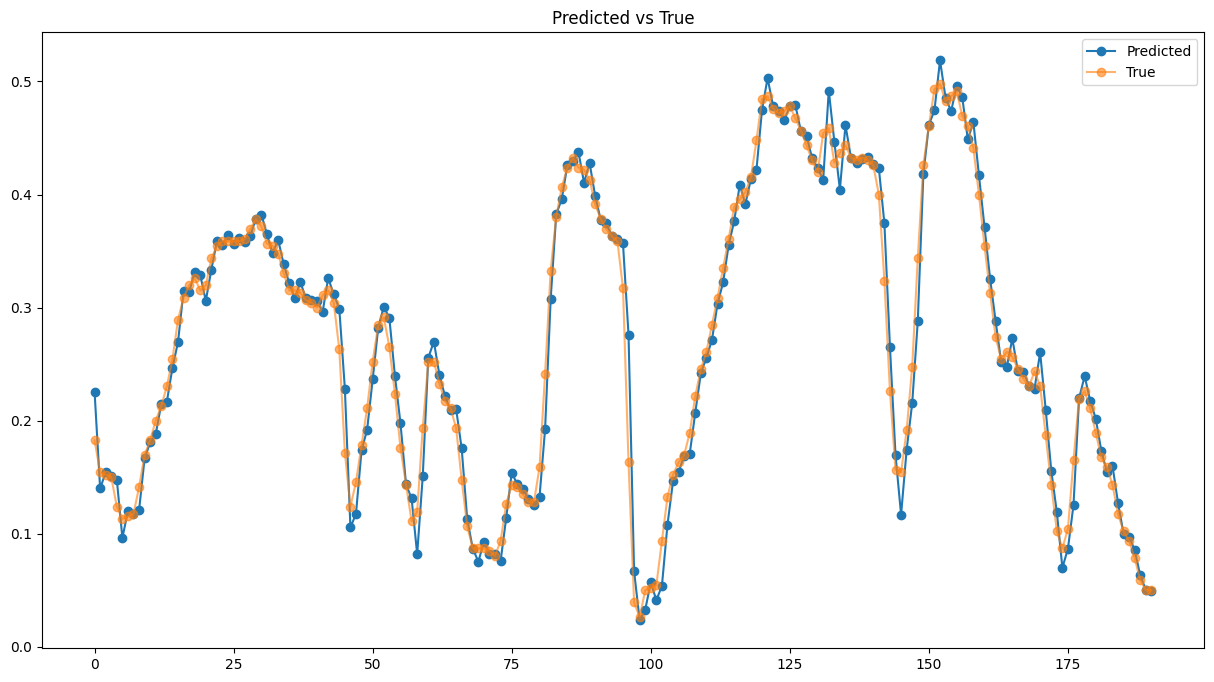

{'mae': 0.012955492199223675,
 'mse': 0.01892157308280263,
 'rmse': 0.00035802592792784105}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

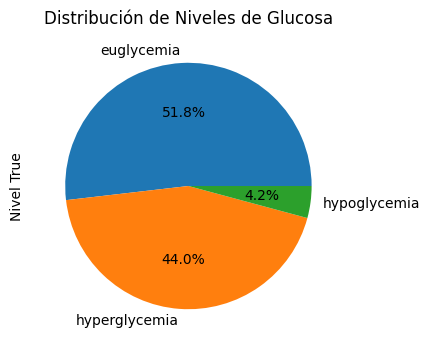

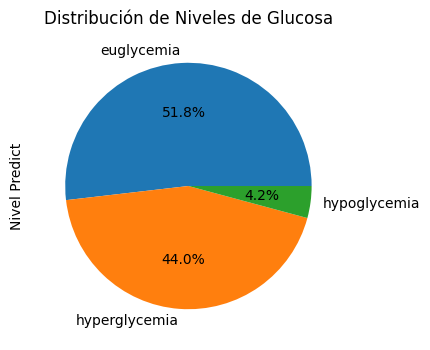

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             143.774078    euglycemia
1               111.0  euglycemia             104.383240    euglycemia
2               110.0  euglycemia             110.958931    euglycemia
3               109.0  euglycemia             109.617393    euglycemia
4                97.0  euglycemia             107.997627    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


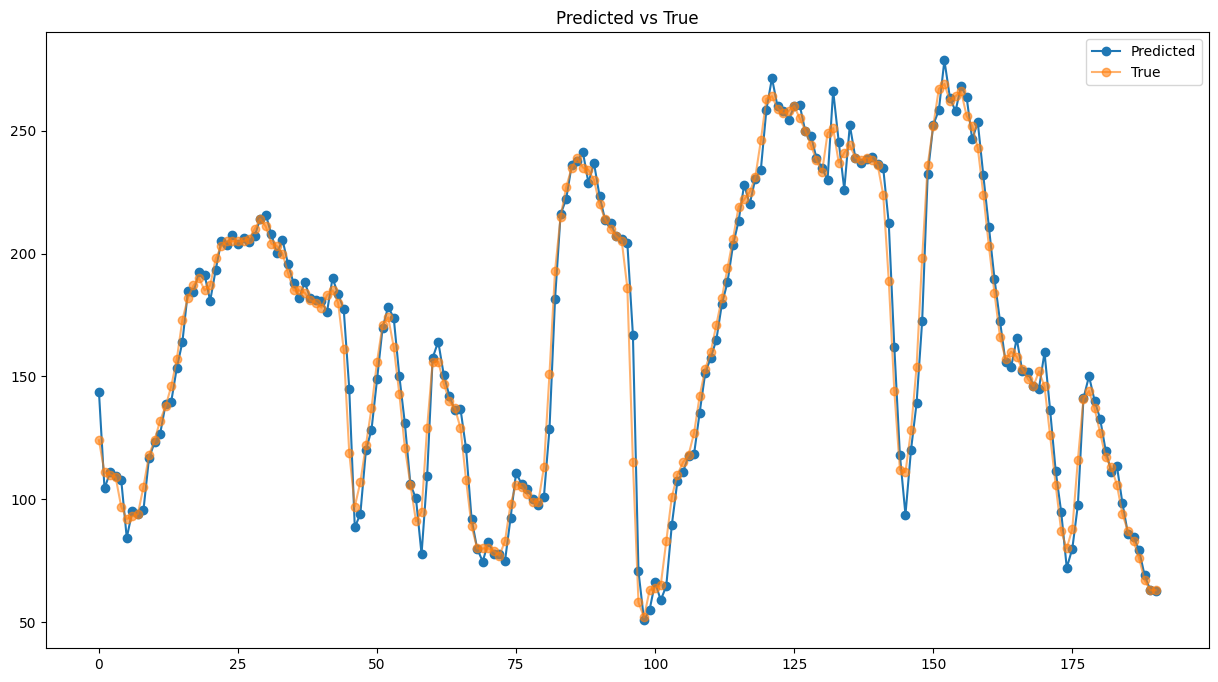

{'mae': 5.959526181845139, 'mse': 8.703923735566374, 'rmse': 75.75828839455569}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  143.774078
2023-01-01 00:15:00   111.0  104.383240
2023-01-01 00:30:00   110.0  110.958931
2023-01-01 00:45:00   109.0  109.617393
2023-01-01 01:00:00    97.0  107.997627
...                     ...         ...
2023-01-02 22:30:00    83.0   84.808182
2023-01-02 22:45:00    76.0   79.251747
2023-01-02 23:00:00    67.0   69.020660
2023-01-02 23:15:00    63.0   63.120548
2023-01-02 23:30:00    63.0   62.839394

[191 rows x 2 columns]

AP, BE, EP: (0.9947368421052631, 0.005263157894736842, 0.0)


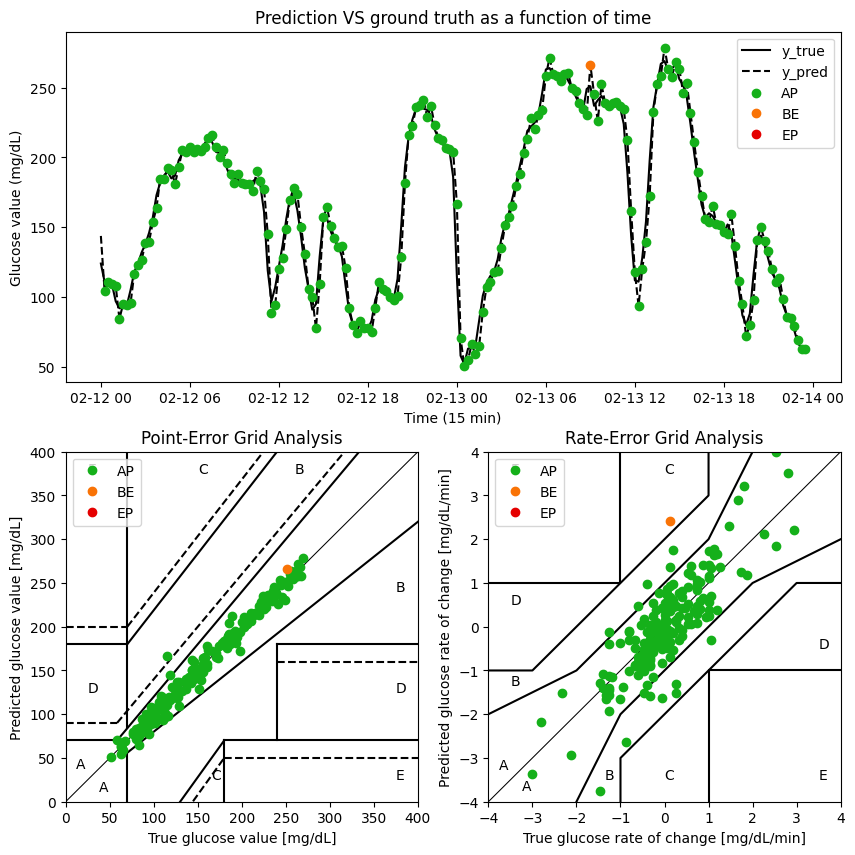

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 1s 11ms/step


Glucose level Predict  Glucose level True
0               0.373803            0.373913
1               0.386521            0.400000
2               0.420950            0.404348
3               0.397054            0.406522
4               0.415382            0.397826

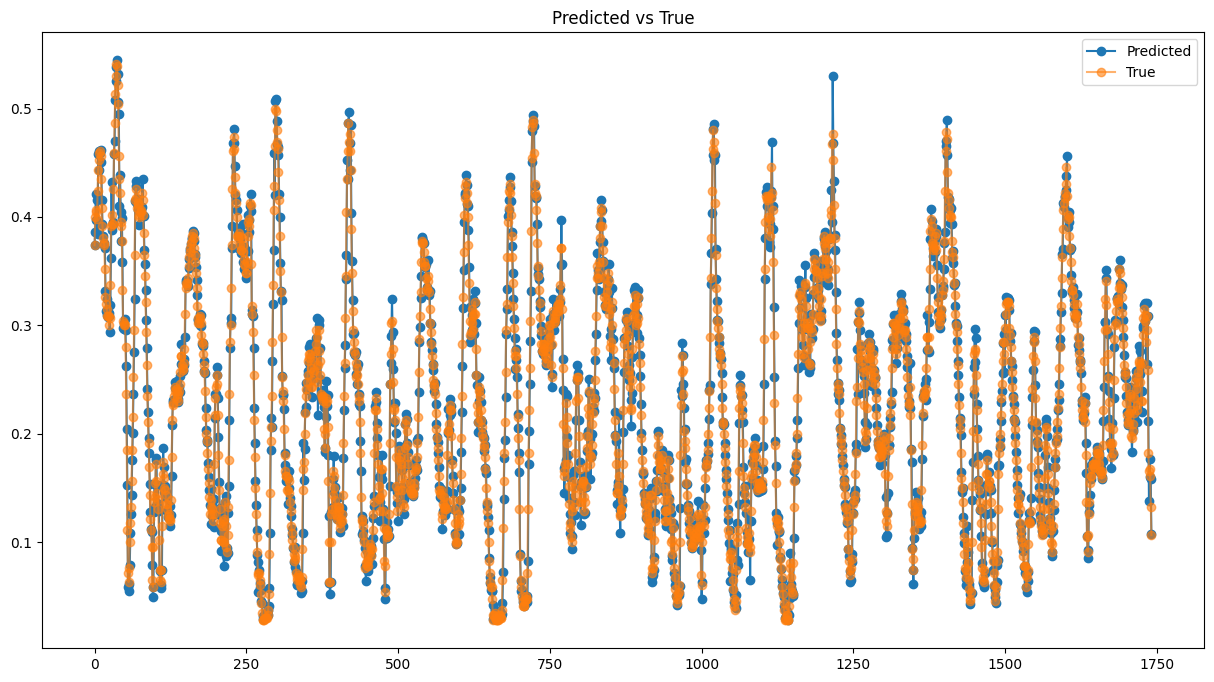

{'mae': 0.008892179702547971,
 'mse': 0.01250828322066321,
 'rmse': 0.00015645714912832482}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

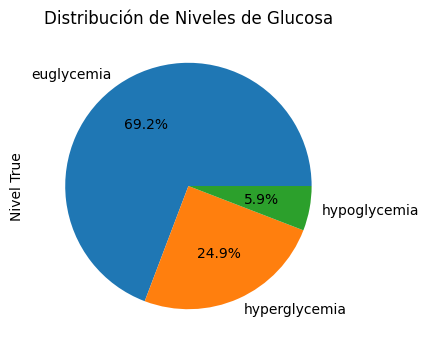

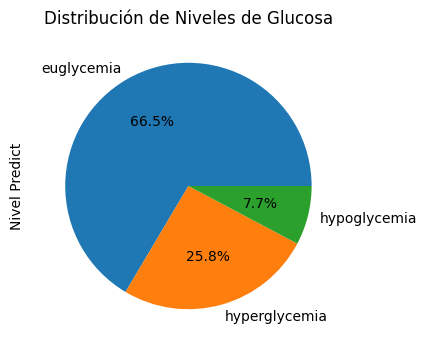

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             211.949356  hyperglycemia
1               224.0  hyperglycemia             217.799683  hyperglycemia
2               226.0  hyperglycemia             233.637207  hyperglycemia
3               227.0  hyperglycemia             222.644684  hyperglycemia
4               223.0  hyperglycemia             231.075531  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


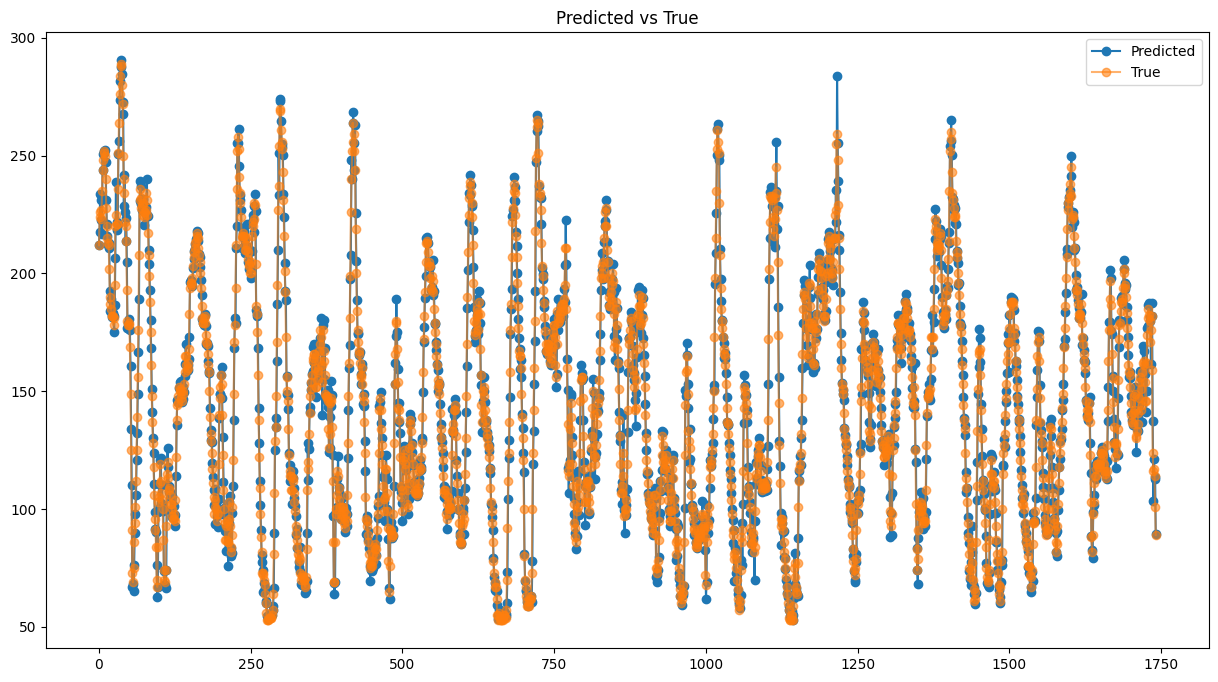

{'mae': 4.09040284592942, 'mse': 5.75381045526638, 'rmse': 33.10633475513271}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  211.949356
2023-01-01 00:15:00   224.0  217.799683
2023-01-01 00:30:00   226.0  233.637207
2023-01-01 00:45:00   227.0  222.644684
2023-01-01 01:00:00   223.0  231.075531
...                     ...         ...
2023-01-19 02:15:00   116.0  103.487564
2023-01-19 02:30:00   117.0  121.246056
2023-01-19 02:45:00   114.0  113.677071
2023-01-19 03:00:00   101.0  112.668793
2023-01-19 03:15:00    89.0   89.633423

[1742 rows x 2 columns]

AP, BE, EP: (0.9936817920735209, 0.005743825387708214, 0.0005743825387708214)


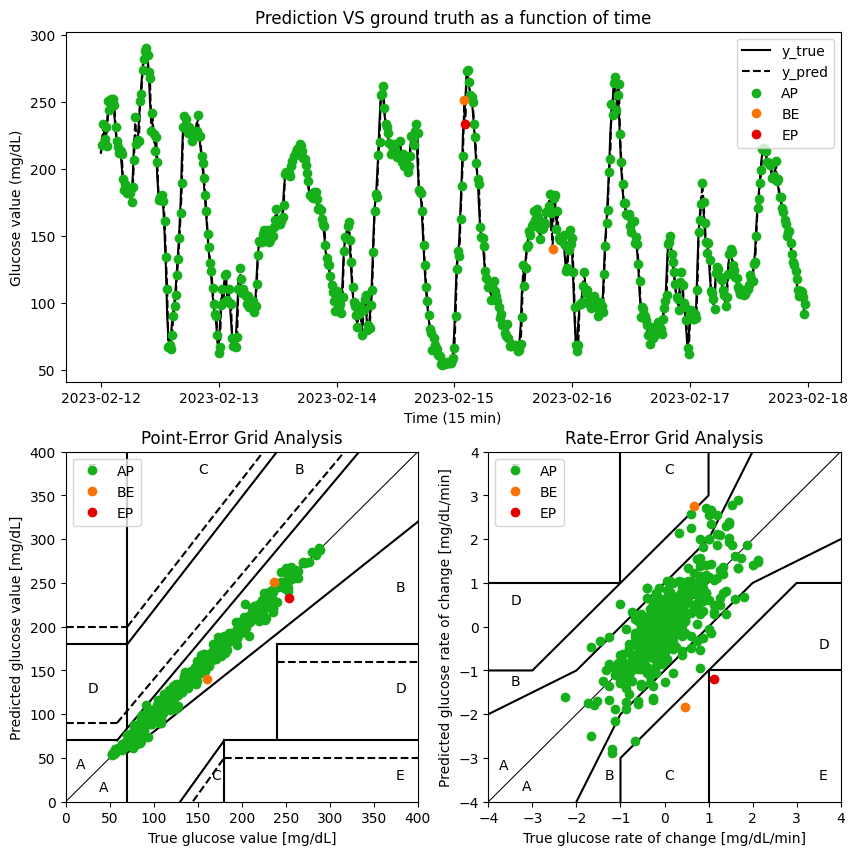

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 9ms/step


Glucose level Predict  Glucose level True
0               0.273898            0.261858
1               0.240277            0.229051
2               0.209111            0.196245
3               0.175012            0.163439
4               0.143153            0.130632

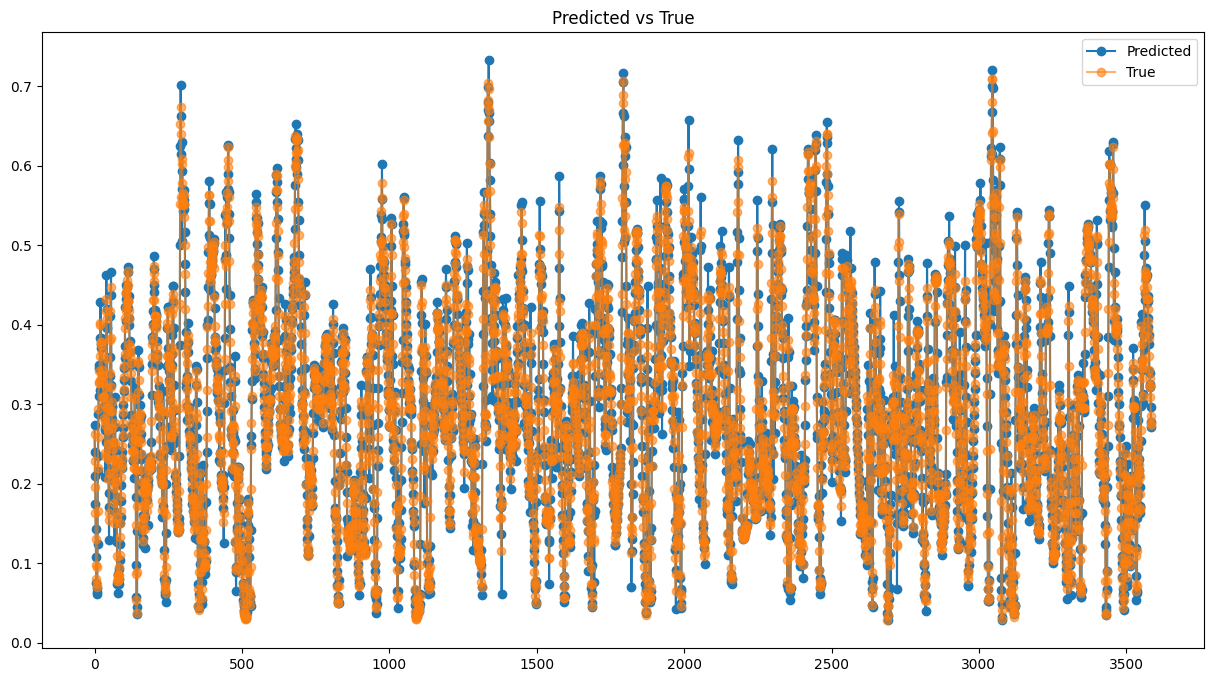

{'mae': 0.014109083837615156,
 'mse': 0.020456040203706706,
 'rmse': 0.00041844958081566503}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

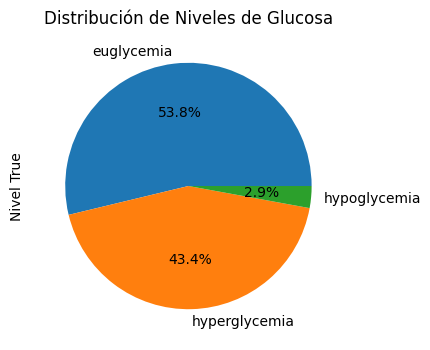

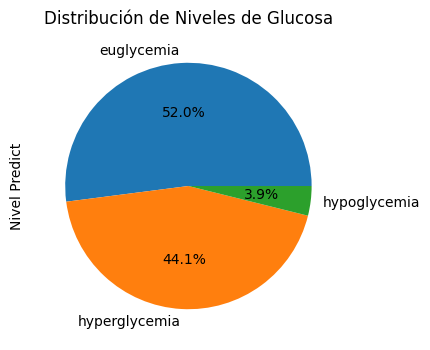

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             165.993042    euglycemia
1          145.363636  euglycemia             150.527557    euglycemia
2          130.272727  euglycemia             136.190933    euglycemia
3          115.181818  euglycemia             120.505730    euglycemia
4          100.090909  euglycemia             105.850578    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


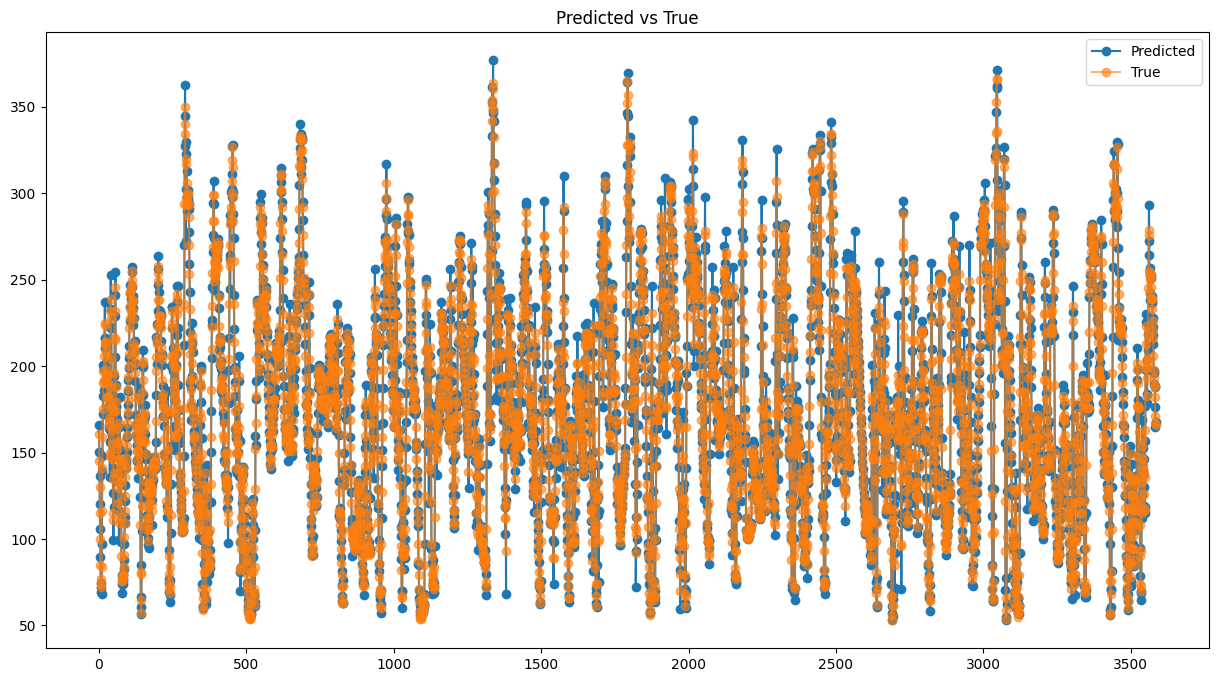

{'mae': 6.490178407488207, 'mse': 9.409778117225944, 'rmse': 88.54392421542421}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  165.993042
2023-01-01 00:15:00  145.363636  150.527557
2023-01-01 00:30:00  130.272727  136.190933
2023-01-01 00:45:00  115.181818  120.505730
2023-01-01 01:00:00  100.090909  105.850578
...                         ...         ...
2023-02-07 07:15:00  188.000000  188.194427
2023-02-07 07:30:00  182.000000  188.764420
2023-02-07 07:45:00  171.000000  176.563705
2023-02-07 08:00:00  167.000000  164.987122
2023-02-07 08:15:00  166.000000  167.883072

[3586 rows x 2 columns]

AP, BE, EP: (0.9718270571827057, 0.02510460251046025, 0.0030683403068340305)


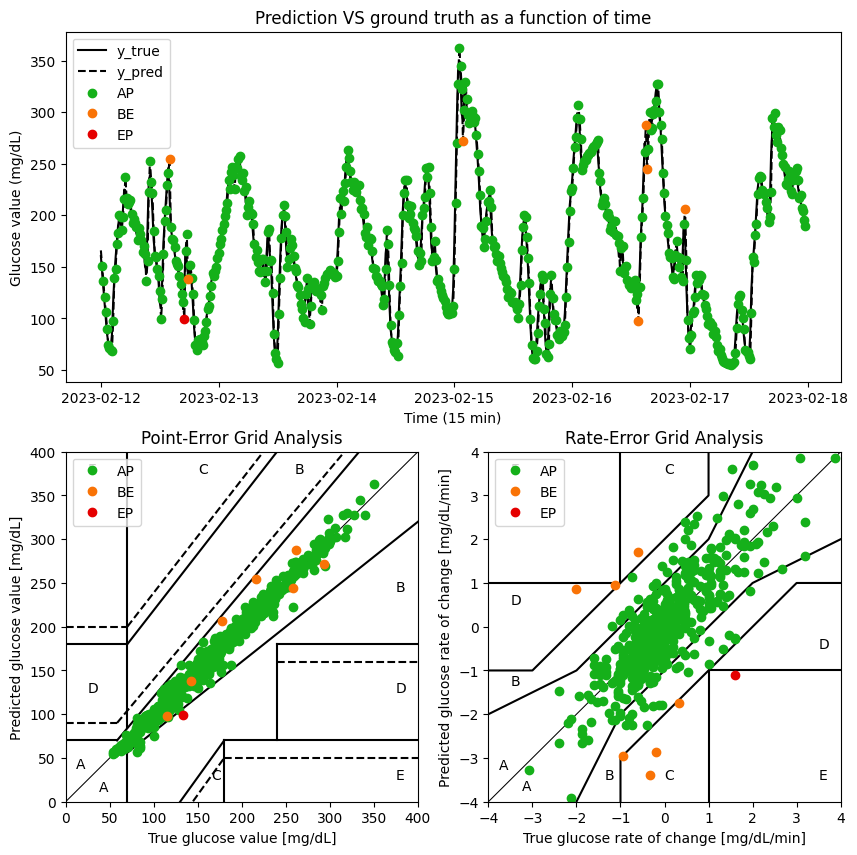

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 9ms/step


Glucose level Predict  Glucose level True
0               0.541245            0.534783
1               0.527072            0.500000
2               0.467220            0.484783
3               0.489019            0.463043
4               0.434407            0.428261

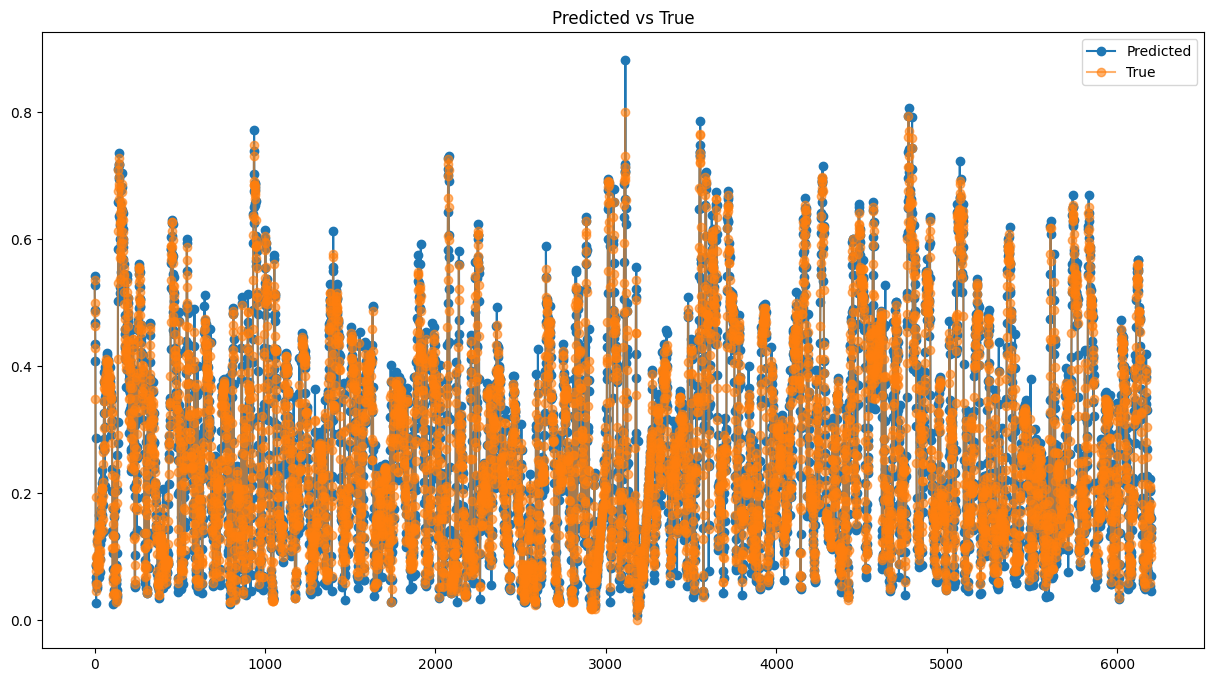

{'mae': 0.016349226231470605,
 'mse': 0.024089175761854716,
 'rmse': 0.0005802883888855288}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

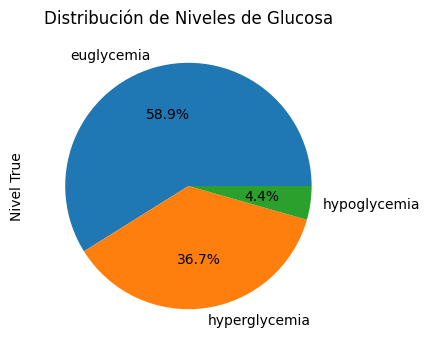

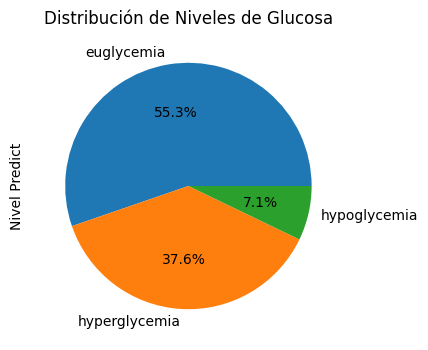

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             288.972504  hyperglycemia
1               270.0  hyperglycemia             282.453094  hyperglycemia
2               263.0  hyperglycemia             254.921173  hyperglycemia
3               253.0  hyperglycemia             264.948730  hyperglycemia
4               237.0  hyperglycemia             239.827316  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


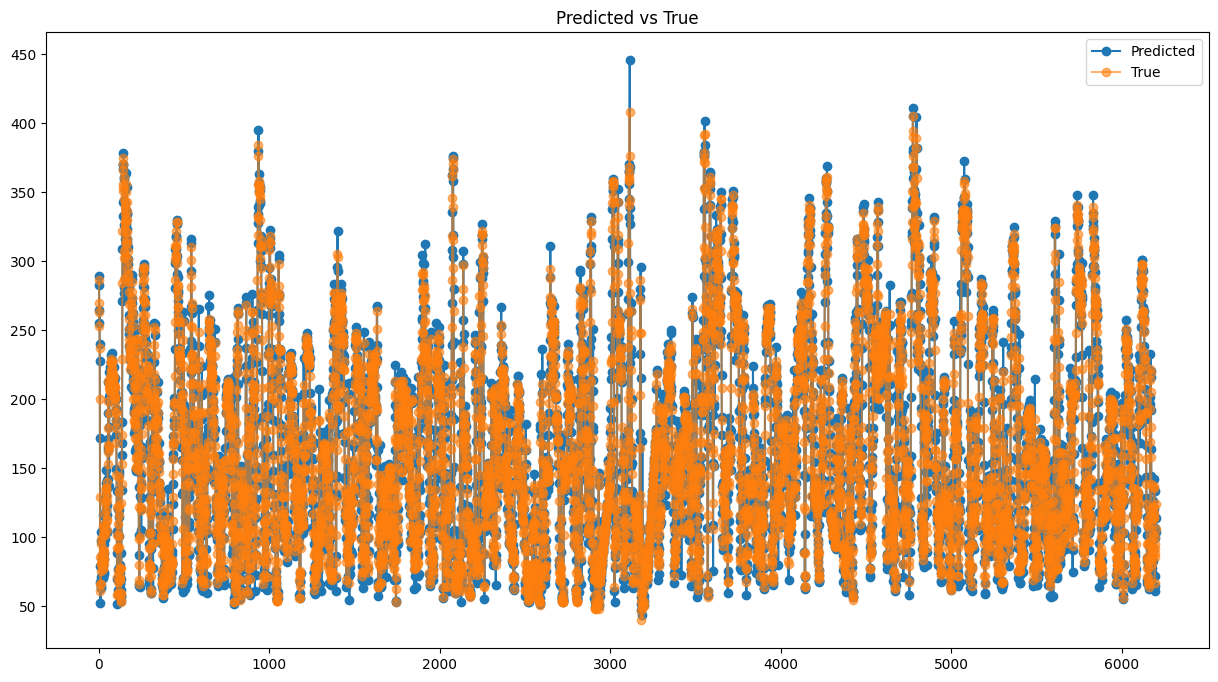

{'mae': 7.520643986926721,
 'mse': 11.081020805906798,
 'rmse': 122.78902210093933}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  288.972504
2023-01-01 00:15:00   270.0  282.453094
2023-01-01 00:30:00   263.0  254.921173
2023-01-01 00:45:00   253.0  264.948730
2023-01-01 01:00:00   237.0  239.827316
...                     ...         ...
2023-03-06 13:00:00   100.0  106.777618
2023-03-06 13:15:00    89.0   99.793434
2023-03-06 13:30:00    92.0   72.094124
2023-03-06 13:45:00   106.0  104.171333
2023-03-06 14:00:00   124.0  113.793037

[6201 rows x 2 columns]

AP, BE, EP: (0.9596774193548387, 0.03516129032258065, 0.005161290322580645)


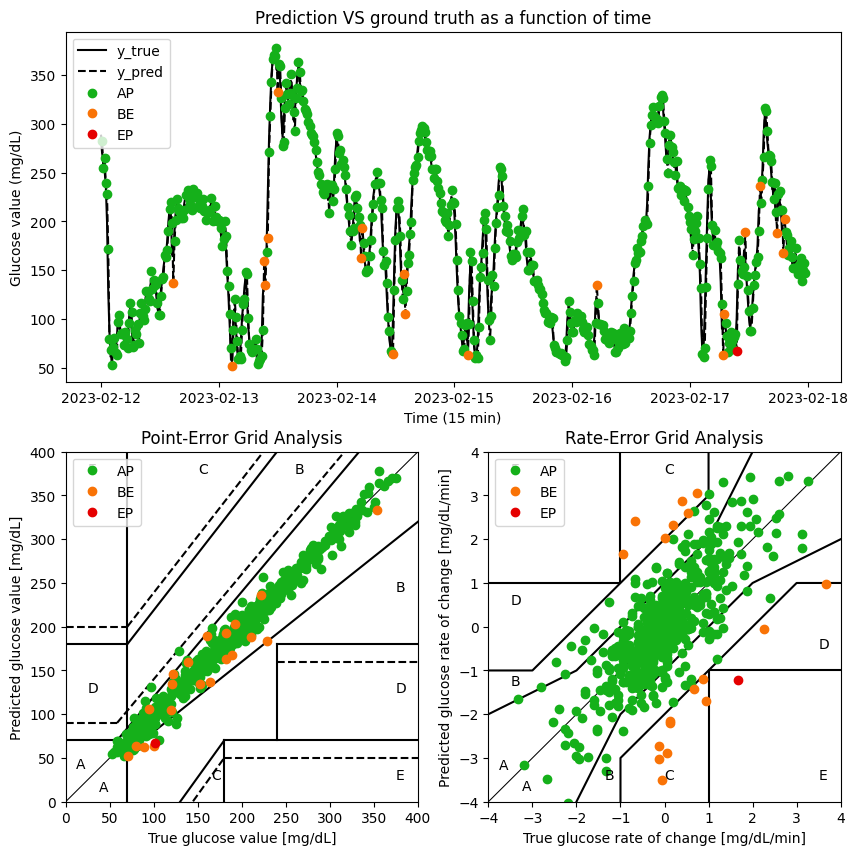

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)